In [ ]:
'''
Alec K. Mattu
INST 414
07/02/2021

Project 2
'''

In [103]:
# Import the needed libraries
import csv
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
import string
import json
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from nltk.corpus import stopwords

# Part 0
## Pre-processing of songs

In [13]:
# Variable for songs
songs = []

# Open CSV and read each row into songs variable
with open('dataset_output.csv') as cvf:
    reader = csv.DictReader(cvf)
    for row in reader:
        # Tokenize lyrics
        tokenized = nltk.word_tokenize(row["lyrics"])
        no_stopwords = [w for w in tokenized if w not in stopwords.words("english")]
        row["lyrics_split"] = [w for w in no_stopwords if w not in string.punctuation]
        
        # Count number of words in lyrics
        row["lyrics_count"] = len(row["lyrics_split"])
        
        # Add song to lyrics list
        songs.append(row)

In [42]:
# View list excerpt 
print(json.dumps(songs[3], indent=4, sort_keys=True))

{
    "artist/band name": "Harry Belafonte",
    "lyrics": "Look, look at Dolly,\nPretty, pretty, pretty, pretty, pretty, pretty dolly\nOh here she come, here she come, here she come\nPretty, pretty Dolly\nWhen Dolly hear them sound the drum\nUp she jump she holler: \"Here I Come\"\nCause she gonna dance, she gonna sing\nShe gonna cause the rafters to ring\nCause she gonna dance, she gonna sing\nShe gonna cause the rafters to ring\nDon't stop her when she hear the call\nDolly Dawn goin' to have herself a ball\nWhen Dolly start to shake an shout\nClear the floor cause she really move about\nWhen Dolly go into a turn\nAll men jump and their eyes begin to burn\nSoon Dolly go into a fall\nTurn an' spin then she starts to climb the wall\nSoon Dolly go into a fall\nTurn an' spin and then she climb the wall",
    "lyrics url": "https://www.azlyrics.com/lyrics/harrybelafonte/dollydawn.html",
    "lyrics_count": 102,
    "lyrics_split": [
        "Look",
        "look",
        "Dolly",
       

In [84]:
# Turn the songs variable into a Pandas DF
df = pd.DataFrame(songs)

In [85]:
# View head/tail of dataframe
df

,song title,artist/band name,year,lyrics url,lyrics,lyrics_split,lyrics_count
0,Shaking The Blues Away,Doris Day,1955,https://www.azlyrics.com/lyrics/dorisday/shaki...,There's an old superstition 'way down south\nE...,"[There, 's, old, superstition, 'way, south, Ev...",81
1,Mood Indigo,"Sinatra, Frank",1955,https://www.azlyrics.com/lyrics/franksinatra/m...,"You ain't been blue; no, no, no\nYou ain't bee...","[You, ai, n't, blue, You, ai, n't, blue, Till,...",63
2,All Alone,Julie London,1956,https://www.azlyrics.com/lyrics/julielondon/al...,"All alone, I'm so all alone\nThere is no one e...","[All, alone, I, 'm, alone, There, one, else, A...",26
3,Dolly Dawn,Harry Belafonte,1956,https://www.azlyrics.com/lyrics/harrybelafonte...,"Look, look at Dolly,\nPretty, pretty, pretty, ...","[Look, look, Dolly, Pretty, pretty, pretty, pr...",102
4,You're My Thrill,"Lee, Peggy",1956,https://www.azlyrics.com/lyrics/peggylee/youre...,"You're my thrill, you do something to me\nYou ...","[You, 're, thrill, something, You, send, chill...",72
...,...,...,...,...,...,...,...
495,You Dancy,Tommy Lee,2020,https://www.azlyrics.com/lyrics/tommylee/youda...,"I said, ""You have any drums in your house?""\nD...","[I, said, ``, You, drums, house, '', Damn, I, ...",213
496,I Just Love You,UPPERROOM,2020,https://www.azlyrics.com/lyrics/upperroom/ijus...,I just wanna move You\nWhat moves You?\nI just...,"[I, wan, na, move, You, What, moves, You, I, w...",264
497,Cowgirl Blues (Mark Wystrach Vocal),Midland,2021,https://www.azlyrics.com/lyrics/midland/cowgir...,"So long, my hill country woman\nDon't cry\nBut...","[So, long, hill, country, woman, Do, n't, cry,...",153
498,Lights On,"Blue Stones, The",2021,https://www.azlyrics.com/lyrics/bluestones/lig...,"I saw it from a distance, it came without a so...","[I, saw, distance, came, without, sound, I, co...",124


# 1A
## Plot the song length by production year

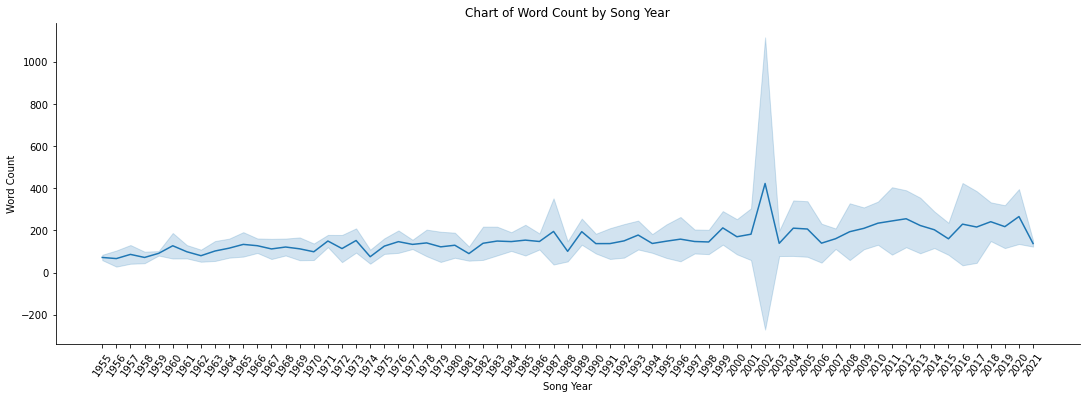

In [86]:
# Basic Rel Plot
sns.relplot(data = df, x = "year", y = "lyrics_count", kind = "line", aspect = 3, ci = "sd")

# Add Rotation to X labels
locs, labels = plt.xticks()
plt.setp(labels, rotation = 55)

# Add X/Y Axis Labels
plt.title("Chart of Word Count by Song Year")
plt.xlabel("Song Year")
plt.ylabel("Word Count")

# Hide Output
None

# Part 1B
## Min-Max scaling and linear regression

In [93]:
# Sklearn Min-Max Scaler
scaler = MinMaxScaler()

# Make a dataframe clone
temp1 = df[["lyrics_count"]]

# Min-max scale lyrics_count 
temp1 = scaler.fit_transform(temp1[["lyrics_count"]])

# Pull scaled arrays out of temp1
temp2 = [w[0] for w in temp1]

# Convert array to dataframe
temp3 = pd.DataFrame(temp2)
temp3.columns = ["lyrics_count_scaled"]

# Join temp dataframe to song dataframe
df = df.join(temp3)

In [94]:
# View new dataframe
df

,song title,artist/band name,year,lyrics url,lyrics,lyrics_split,lyrics_count,lyrics_count_scaled
0,Shaking The Blues Away,Doris Day,1955,https://www.azlyrics.com/lyrics/dorisday/shaki...,There's an old superstition 'way down south\nE...,"[There, 's, old, superstition, 'way, south, Ev...",81,0.043597
1,Mood Indigo,"Sinatra, Frank",1955,https://www.azlyrics.com/lyrics/franksinatra/m...,"You ain't been blue; no, no, no\nYou ain't bee...","[You, ai, n't, blue, You, ai, n't, blue, Till,...",63,0.033787
2,All Alone,Julie London,1956,https://www.azlyrics.com/lyrics/julielondon/al...,"All alone, I'm so all alone\nThere is no one e...","[All, alone, I, 'm, alone, There, one, else, A...",26,0.013624
3,Dolly Dawn,Harry Belafonte,1956,https://www.azlyrics.com/lyrics/harrybelafonte...,"Look, look at Dolly,\nPretty, pretty, pretty, ...","[Look, look, Dolly, Pretty, pretty, pretty, pr...",102,0.055041
4,You're My Thrill,"Lee, Peggy",1956,https://www.azlyrics.com/lyrics/peggylee/youre...,"You're my thrill, you do something to me\nYou ...","[You, 're, thrill, something, You, send, chill...",72,0.038692
...,...,...,...,...,...,...,...,...
495,You Dancy,Tommy Lee,2020,https://www.azlyrics.com/lyrics/tommylee/youda...,"I said, ""You have any drums in your house?""\nD...","[I, said, ``, You, drums, house, '', Damn, I, ...",213,0.115531
496,I Just Love You,UPPERROOM,2020,https://www.azlyrics.com/lyrics/upperroom/ijus...,I just wanna move You\nWhat moves You?\nI just...,"[I, wan, na, move, You, What, moves, You, I, w...",264,0.143324
497,Cowgirl Blues (Mark Wystrach Vocal),Midland,2021,https://www.azlyrics.com/lyrics/midland/cowgir...,"So long, my hill country woman\nDon't cry\nBut...","[So, long, hill, country, woman, Do, n't, cry,...",153,0.082834
498,Lights On,"Blue Stones, The",2021,https://www.azlyrics.com/lyrics/bluestones/lig...,"I saw it from a distance, it came without a so...","[I, saw, distance, came, without, sound, I, co...",124,0.067030


In [121]:
# Linear regression values
x = df["year"].values.reshape(-1, 1)
y = df["lyrics_count_scaled"].values.reshape(-1, 1)

In [122]:
# Basic linear model
model = linear_model.LinearRegression()

# Split data into training values
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size = 0.25)

# Create training model
model.fit(xtrain, ytrain)

# Show test
ypred_test = model.predict(xtest)

TypeError: unhashable type: 'numpy.ndarray'

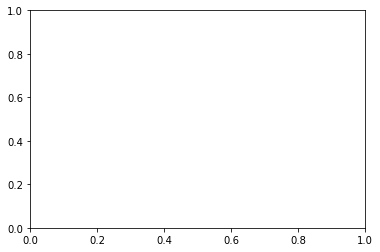

In [125]:
# Show plot
plt.scatter(xtrain, ytrain, c = "blue") # Training data
plt.scatter(xtest, ytest, c = "red") # Testing data
plt.plot(xtest, ypred_test);